In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
from matplotlib import pyplot
from datetime import date

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import finn_finance as f
from finn_finance import crypto_account

transactions = [['BTC/USD',46726.59,'2022-04-04',97.01,'Buy'],['BTC/USD',37837.50,'2022-04-30',197.01,'Buy'],['BTC/USD',30810.31,'2022-05-09',295.60,'Buy'],['ETH/USD',3525.92,'2022-04-04',97.01,'Buy'],['ETH/USD',2880.60,'2022-05-01',295.6,'Buy'],['ETH/USD',2297.32,'2022-05-09',295.60,'Buy'],['BTC/USD',20397.38 ,'2022-06-17',344.75,'Sell'],['ETH/USD',1072.53 ,'2022-06-17',277.71,'Sell']]

today = date.today()
day_1 = datetime.timedelta(1)
yesterday = today - day_1
get_yesterday = yesterday.strftime("%Y-%m-%d")


In [2]:
file = 'Coinbase-61c7c47cc8f40cd7a72cd6da-TransactionsHistoryReport-2022-06-29-05-48-54.csv'
data_coin = pd.read_csv(file, header=7)
# len(data_coin)
data_coin.head()

,Timestamp,Transaction Type,Asset,Quantity Transacted,Spot Price Currency,Spot Price at Transaction,Subtotal,Total (inclusive of fees),Fees,Notes
0,2022-01-03T15:29:36Z,Buy,BTC,0.000213,USD,46958.63,10.00,10.00,0.00,Bought 0.00021295 BTC for $10.00 USD
1,2022-01-03T20:46:07Z,Buy,BTC,0.002105,USD,46080.04,97.01,100.00,2.99,Bought 0.00210525 BTC for $100.00 USD
2,2022-02-05T17:49:00Z,Sell,BTC,0.002294,USD,41420.14,95.00,92.01,2.99,Sold 0.00229357 BTC for $92.01 USD
3,2022-04-05T01:15:43Z,Buy,BTC,0.002076,USD,46726.59,97.01,100.00,2.99,Bought 0.00207612 BTC for $100.00 USD
4,2022-05-01T00:01:41Z,Buy,BTC,0.005207,USD,37837.50,197.01,200.00,2.99,Bought 0.00520674 BTC for $200.00 USD


In [3]:
file = 'Coinbase-61c7c47cc8f40cd7a72cd6da-TransactionsHistoryReport-2022-06-29-05-48-54.csv'
data_coin = pd.read_csv(file, header=7)
# len(data_coin)
# data_coin
# print(data_coin['Asset'][0]+'/'+data_coin['Spot Price Currency'][0])
df_eth = crypto_account(data_coin).filter_crypto_transactions(ticker='ETH/USD')
df_eth

[['ETH/USD',
  3737.62,
  Timestamp('2022-01-01 08:21:45+0000', tz='UTC'),
  97.01,
  'Buy'],
 ['ETH/USD',
  3050.08,
  Timestamp('2022-01-08 20:59:29+0000', tz='UTC'),
  197.01,
  'Buy'],
 ['ETH/USD',
  2376.51,
  Timestamp('2022-01-22 19:52:01+0000', tz='UTC'),
  295.6,
  'Buy'],
 ['ETH/USD',
  3002.76,
  Timestamp('2022-02-05 17:48:15+0000', tz='UTC'),
  645.0,
  'Sell'],
 ['ETH/USD',
  3525.92,
  Timestamp('2022-04-05 01:14:48+0000', tz='UTC'),
  97.01,
  'Buy'],
 ['ETH/USD',
  2880.6,
  Timestamp('2022-05-02 06:23:26+0000', tz='UTC'),
  295.6,
  'Buy'],
 ['ETH/USD',
  2297.32,
  Timestamp('2022-05-10 01:00:09+0000', tz='UTC'),
  295.6,
  'Buy'],
 ['ETH/USD',
  1072.53,
  Timestamp('2022-06-17 18:37:30+0000', tz='UTC'),
  277.71,
  'Sell']]

In [4]:
# Set Lookback
lookback_window = 90

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-04-14
End Date: 2022-07-13


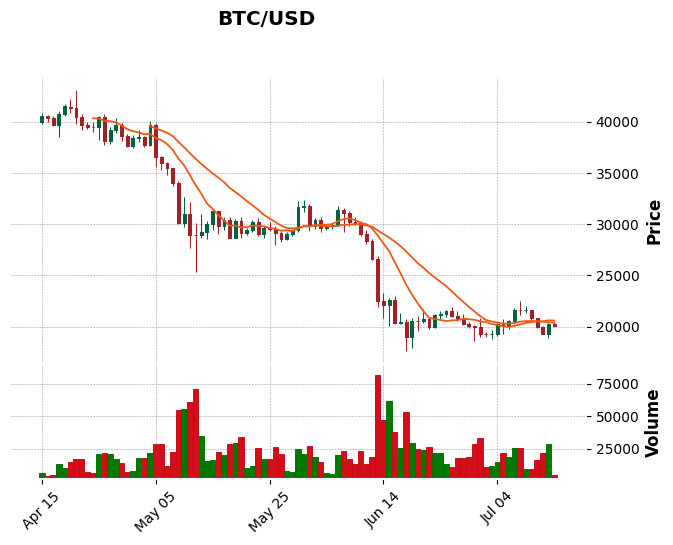

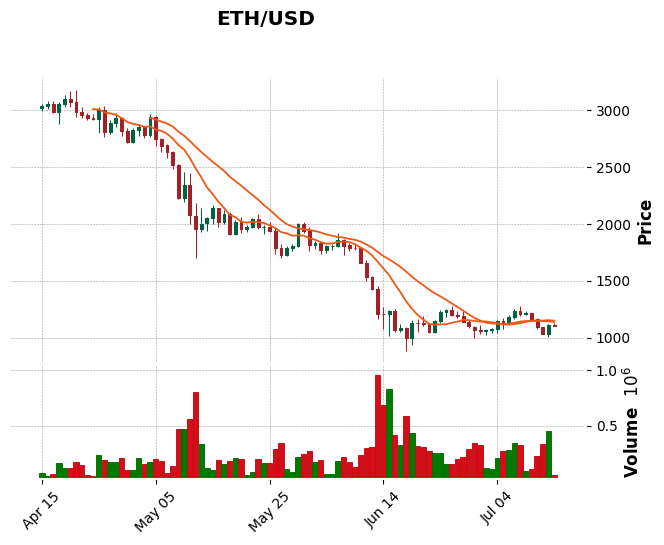

In [5]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    f.candle_stick(date_candle,i)

In [6]:
df_btc = crypto_account(data_coin).crypto_dollar_value(ticker='BTC/USD')

print('Bitcoin Value on '+str(df_btc.index.array[len(df_btc)-1])+': $'+str(df_btc.iloc[len(df_btc)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_btc.plot.line(legend=None)
pyplot.title('Bitcoin Account Value')

TypeError: Invalid comparison between dtype=datetime64[ns] and Timestamp

In [ ]:
df_eth = crypto_account(data_coin).crypto_dollar_value(ticker='ETH/USD')

print('Ethereum Value on '+str(df_eth.index.array[len(df_eth)-1])+': $'+str(df_eth.iloc[len(df_eth)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_eth.plot.line(legend=None)
pyplot.title('Ethereum Account Value')